# How are in-demand skills trending for Data Analysts
Metodology
    1. Aggregate skill counts monthly
    2. Re-analyze based on percentage of total jobs
    3. Plot the monthly skill demand

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
#Loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\abc\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_DA_US=df[(df['job_country']=='United States') & (df['job_title']=='Data Analyst')].copy()

In [6]:
df_DA_US['job_posted_month_no']=df_DA_US['job_posted_date'].dt.month

In [7]:
df_DA_US_explode=df_DA_US.explode('job_skills')

In [13]:
df_DA_US_pivot=df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_US_pivot.loc['Total']=df_DA_US_pivot.sum()
df_DA_US_pivot=df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot=df_DA_US_pivot.drop('Total')

In [15]:
DA_totals=df_DA_US.groupby('job_posted_month_no').size()

In [19]:
df_DA_US_percent=df_DA_US_pivot.div(DA_totals/100,axis=0)

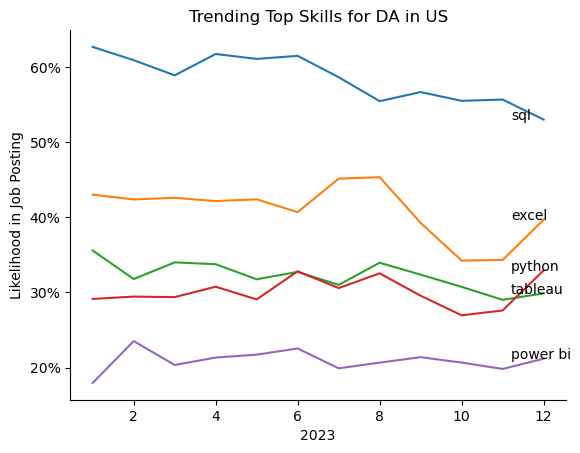

In [31]:
df_plot=df_DA_US_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.despine()
plt.title('Trending Top Skills for DA in US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])